## 最常⽤的優化算法 - Gradient Descent

    這種算法使⽤各參數的梯度值來最⼩化或最⼤化損失函數E(x)。

    通過尋找最⼩值，控制⽅差，更新模型參數，最終使模型收斂

    wi+1 = wi - di·ηi, i=0,1,…

    • 參數 η 是學習率。這個參數既可以設置為固定值，也可以⽤⼀維優化⽅法沿著訓練的⽅向逐步更新計算

    • 參數的更新分為兩步：第⼀步計算梯度下降的⽅向，第⼆步計算合適的學習

--

## 複習 – 動量Momentum

### 「⼀顆球從⼭上滾下來，在下坡的時候速度越來越快，遇到上坡，⽅向改變，速度下降」

加入的這⼀項，可以使得梯度⽅向不變的維度上速度變快，梯度⽅向有所改變的維度上的更新速度變慢，這樣就可以<font color="red">加快收斂並減⼩震盪</font>

--

## Optimizer – SGD 說明

## SGD-隨機梯度下降法(stochastic gradient decent)


    優點：SGD 每次更新時對每個樣本進⾏梯度更新， 對於很⼤的數據集來說，可能會有相似的樣本，
         ⽽ SGD ⼀次只進⾏⼀次更新，就沒有冗餘，⽽且比較快

    缺點：但是 SGD 因為更新比較頻繁，會造成 cost function 有嚴重的震盪


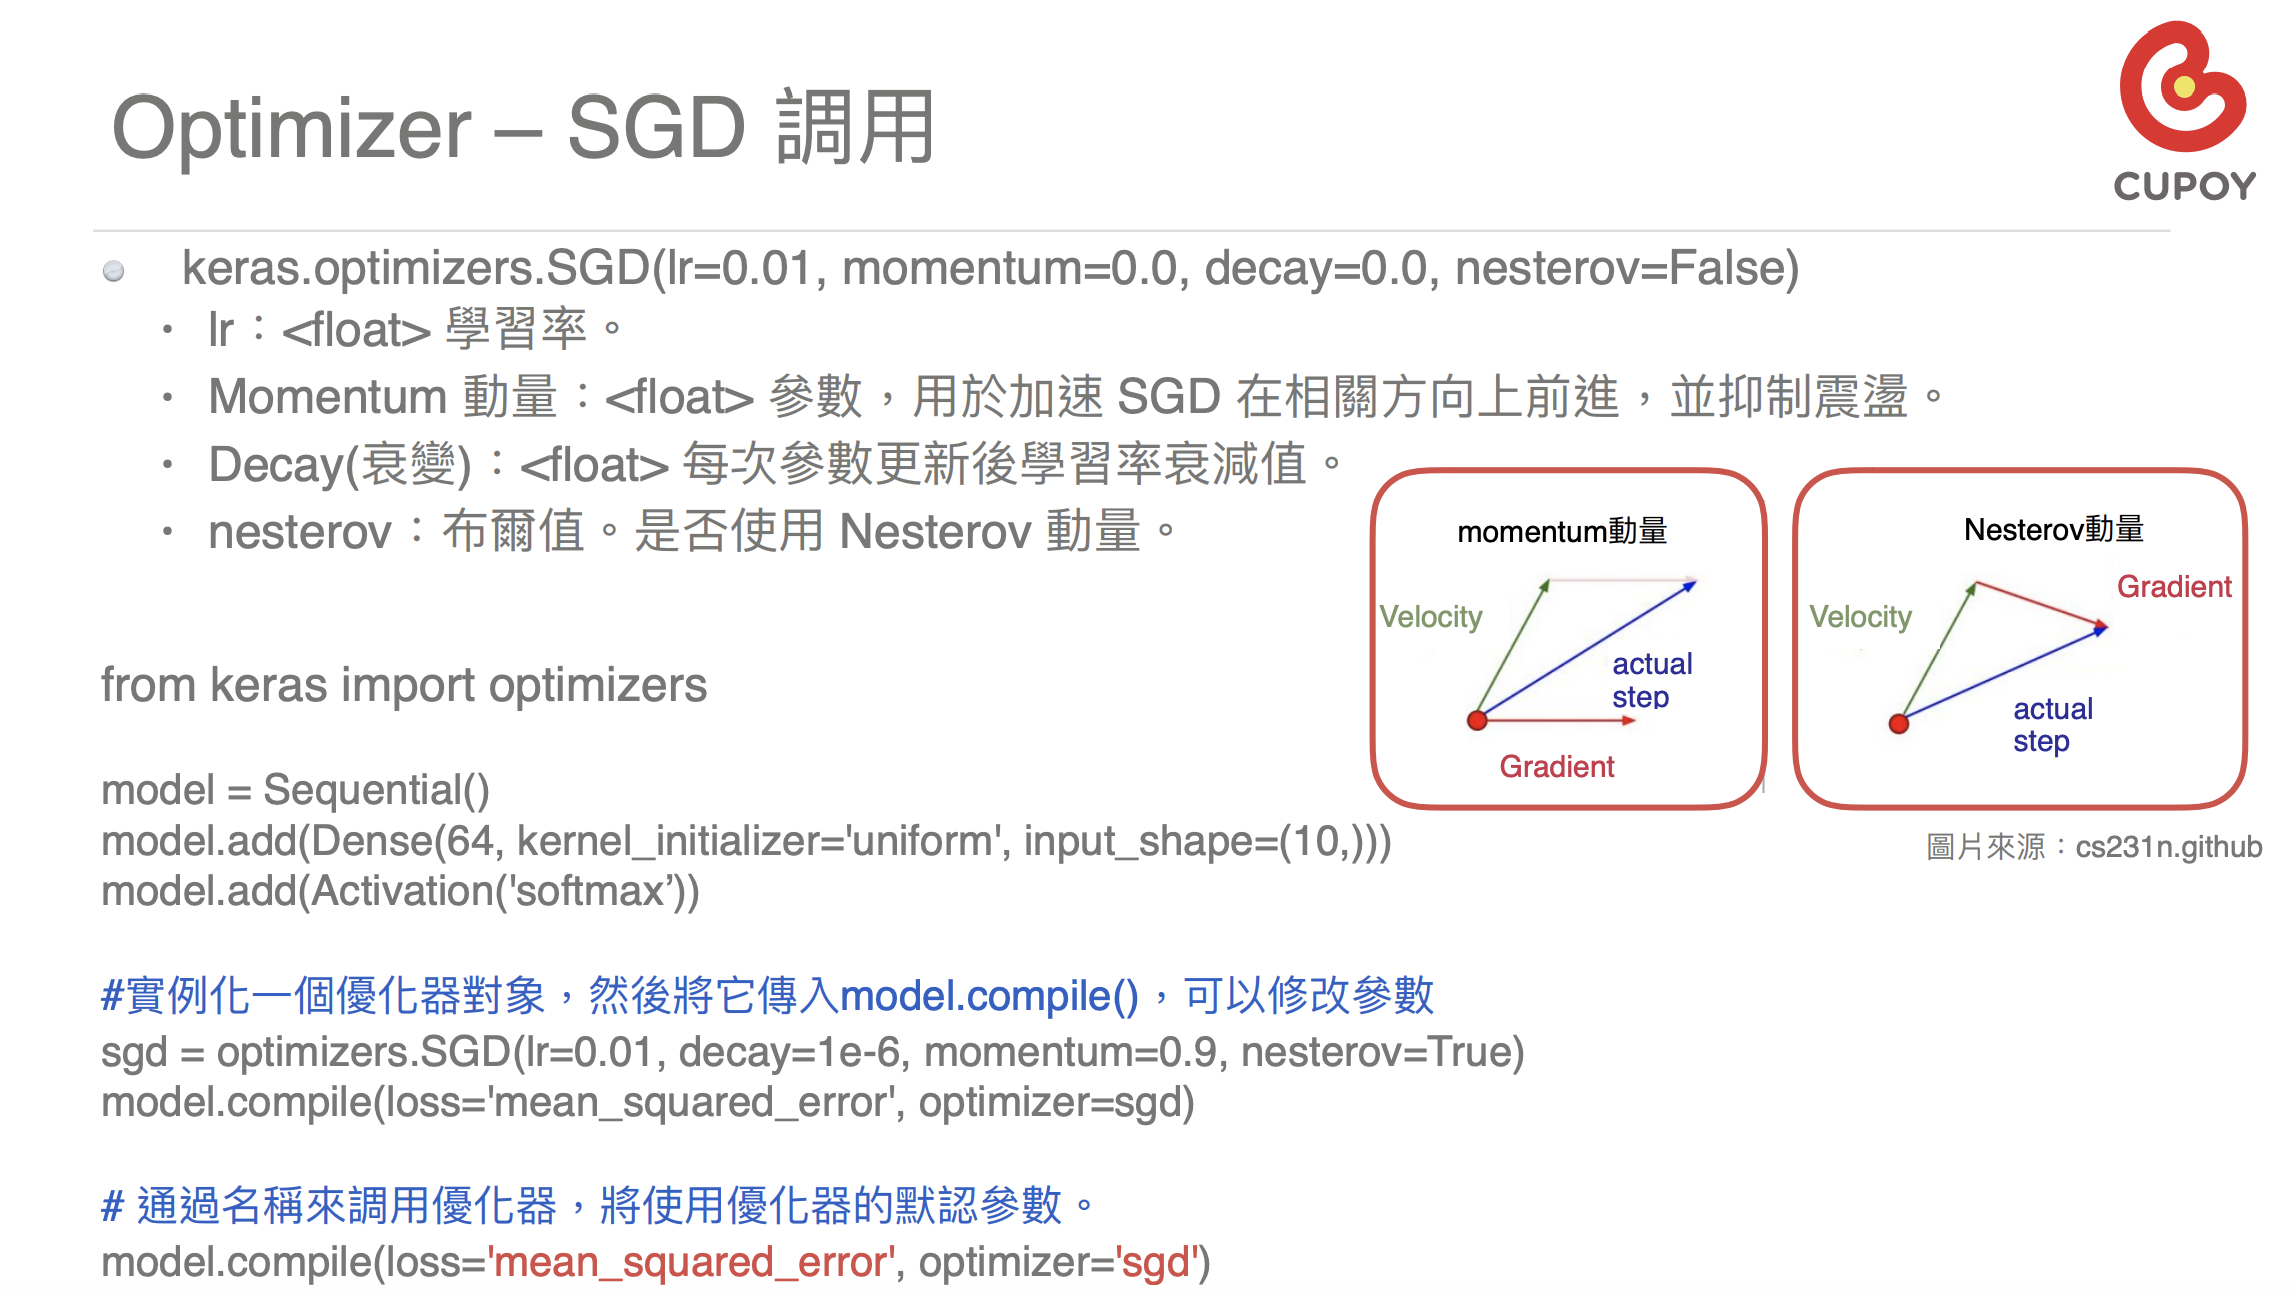


--


## Optimizer – SGD, mini-batch gradient descent

## batch-gradient，其實就是普通的梯度下降算法但是採⽤批量處理。


    • 當數據集很⼤（比如有100000個左右時），每次 iteration 都要將1000000 個數據跑⼀遍，機器帶不動。
    
      於是有了 mini-batch-gradient —— 將 1000000 個樣本分成 1000 份，每份 1000 個，都看成⼀組獨立的數據集，
      進⾏ forward_propagation 和 backward_propagation。
      
<font color="red">在整個算法的流程中，cost function 是局部的，但是W和b是全局的。</font>




## 如何選擇優化器

    > 隨機梯度下降（SGD）：SGD 指的是 mini batch gradient descent 優點：針對⼤數據集，訓練速度很快。
      從訓練集樣本中隨機選取⼀個 batch 計算⼀次梯度，更新⼀次模型參數。
    
        • 缺點：

        對所有參數使⽤相同的學習率。對於稀疏數據或特徵，希望盡快更新⼀些不經常出現的特徵，慢⼀些更新常出現的特徵。
        所以選擇合適的學習率比較難．

--


    > 容易收斂到局部最優 Adam：利⽤梯度的⼀階矩估計和⼆階矩估計動態調節每個參數的學習率。
    
        • 優點：

        1.經過偏置校正後，每⼀次迭代都有確定的範圍，使得參數比較平穩。善於處理稀疏梯度和非平穩⽬標。

        2.對內存需求⼩

        3.對不同內存計算不同的學習率
  
  
--      
  
  
    > RMSProp：⾃適應調節學習率。對學習率進⾏了約束，適合處理非平穩⽬標和 RNN。
    
    
--

## 如何選擇優化器


> 如果輸入數據集比較稀疏，SGD、NAG和動量項等⽅法可能效果不好。因此對於稀疏數據集，應該使⽤某種⾃適應學習率的⽅法，且另⼀好處為不需要⼈為調整學習率，使⽤默認參數就可能獲得最優值。
    
    • Adagrad, RMSprop, Adam。



> 如果想使訓練深層網絡模型快速收斂或所構建的神經網絡較為複雜，則應該使⽤ Adam 或其他⾃適應學習速率的⽅法，因為這些⽅法的實際效果更優。

    • Adam 就是在 RMSprop 的基礎上加了 bias-correction 和momentum，
    • 隨著梯度變的稀疏，Adam 比 RMSprop 效果會好。

## 課程重點:

利用Keras 建立神經網路模型

查看優化器的結果


## 範例目標:

使用CIFAR-10圖庫, 看看完整神經網路

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

Using TensorFlow backend.


In [2]:
# Blas GEMM launch failed , 避免動態分配 GPU / CPU, 出現問題
import tensorflow as tf

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [4]:
# 檢查Dataset 的描述與資訊
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
#   第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

W0718 09:36:56.036299 4633769408 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 09:36:56.045773 4633769408 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 09:36:56.078929 4633769408 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0718 09:36:56.134211 4633769408 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.

In [6]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1250858


In [7]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [8]:
# 第三步編譯
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

W0718 09:37:36.672843 4633769408 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0718 09:37:36.699084 4633769408 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
# 資料正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 # 相當於 x_train = x_train / 255 (除以 255 對於這個資料集來說是正規化)
x_test /= 255

In [12]:
a=510
a/=255
a

2.0

In [13]:
# 是否要做資料處理
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, 
                        y_train,
                        batch_size = batch_size,
                        epochs = epochs,
                        validation_data = (x_test, y_test),
                        shuffle = True)
else:
    print('Using real-time data augmentation.')
    print('')
        
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
                featurewise_center=False,  # set input mean to 0 over the dataset
                samplewise_center=False,  # set each sample mean to 0
                featurewise_std_normalization=False,  # divide inputs by std of the dataset
                samplewise_std_normalization=False,  # divide each input by its std
                zca_whitening=False,  # apply ZCA whitening
                zca_epsilon=1e-06,  # epsilon for ZCA whitening
                rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
                # randomly shift images horizontally (fraction of total width)
                width_shift_range=0.1,
                # randomly shift images vertically (fraction of total height)
                height_shift_range=0.1,
                shear_range=0.,  # set range for random shear
                zoom_range=0.,  # set range for random zoom
                channel_shift_range=0.,  # set range for random channel shifts
                # set mode for filling points outside the input boundaries
                fill_mode='nearest',
                cval=0.,  # value used for fill_mode = "constant"
                horizontal_flip=True,  # randomly flip images
                vertical_flip=False,  # randomly flip images
                # set rescaling factor (applied before any other transformation)
                rescale=None,
                # set function that will be applied on each input
                preprocessing_function=None,
                # image data format, either "channels_first" or "channels_last"
                data_format=None,
                # fraction of images reserved for validation (strictly between 0 and 1)
                validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)
    history = model.fit(x_train, 
                        y_train,
                        batch_size = batch_size,
                        epochs = epochs,
                        validation_data = (x_test, y_test),
                        shuffle = True)   

'''
   第四步：訓練
   .fit的一些參數
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   shuffle：是否把數據隨機打亂之後再進行訓練
   validation_split：拿出百分之多少用來做交叉驗證
   verbose：屏顯模式 - 0：不輸出, 1：輸出進度, 2：輸出每次的訓練結果
''' 
    

Using real-time data augmentation.



W0718 09:44:11.786478 4633769408 deprecation.py:323] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 176s 4ms/step - loss: 1.5164 - acc: 0.4450 - val_loss: 1.2966 - val_acc: 0.5411
Epoch 2/20
50000/50000 [==============================] - 177s 4ms/step - loss: 1.1205 - acc: 0.6021 - val_loss: 0.9810 - val_acc: 0.6550
Epoch 3/20
50000/50000 [==============================] - 172s 3ms/step - loss: 0.9643 - acc: 0.6614 - val_loss: 0.8511 - val_acc: 0.6977
Epoch 4/20
50000/50000 [==============================] - 192s 4ms/step - loss: 0.8693 - acc: 0.6949 - val_loss: 0.7808 - val_acc: 0.7306
Epoch 5/20
50000/50000 [==============================] - 206s 4ms/step - loss: 0.8121 - acc: 0.7144 - val_loss: 0.7214 - val_acc: 0.7491
Epoch 6/20
50000/50000 [==============================] - 173s 3ms/step - loss: 0.7642 - acc: 0.7339 - val_loss: 0.7107 - val_acc: 0.7546
Epoch 7/20
50000/50000 [==============================] - 166s 3ms/step - loss: 0.7319 - acc: 0.7443 - val_loss: 0.6929 - 

'\n   第四步：訓練\n   .fit的一些參數\n   batch_size：對總的樣本數進行分組，每組包含的樣本數量\n   epochs ：訓練次數\n   shuffle：是否把數據隨機打亂之後再進行訓練\n   validation_split：拿出百分之多少用來做交叉驗證\n   verbose：屏顯模式 - 0：不輸出, 1：輸出進度, 2：輸出每次的訓練結果\n'

In [14]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

#    第六步：輸出
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /Users/johnsonhuang/py_ds/ML_100/2nd-ML100Days/homework/Day_076_HW/saved_models/keras_cifar10_trained_model.h5 
10000/10000 [==============================] - 4s 449us/step
Test loss: 0.6498869025707245
Test accuracy: 0.7833


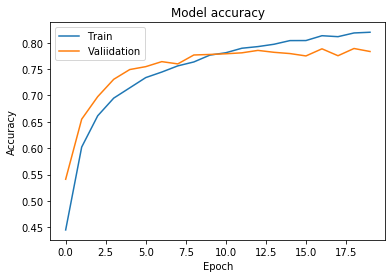

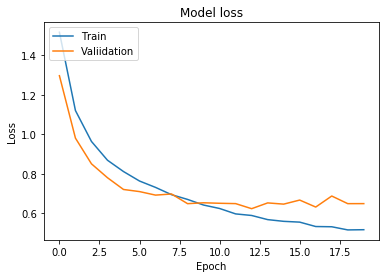

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()

## 範例目標:

推導 優化器: Adam, 了解其原理與優化過程


## 範例重點:

提供 AdamOptimizer 的範例, 可以讓學員驗證 m, v與 β的變化關係

以下的片段範例需要有 ffmpeg

請務必使用 conda 指令安裝

務必確認HDD 有足夠的空間



<font color="red"> conda install -c conda-forge ffmpeg </font>



NOTE: 必須在執行此一範例前先行安裝

<font color="red"> conda update -n base -c defaults conda </font>

In [16]:
import sys
print(sys.version)

3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


conda install -c menpo ffmpeg 

!pip install autograd

!pip install IPython

In [17]:
# ! pip install autograd

  Stored in directory: /Users/johnsonhuang/Library/Caches/pip/wheels/72/6f/c2/40f130cca2c91f31d354bf72de282922479c09ce0b7853c4c5
Successfully built autograd


> <font color="red">conda config --append channels conda-forge</font>

> <font color="red">conda install autograd</font>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad,value_and_grad,grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest

## Objective function: the Beale function

In [2]:
# Objective function: the Beale function

f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

z = f(x, y)
minima = np.array([3., .5])
f(*minima)

0.0

In [3]:
minima_ = minima.reshape(-1, 1)
minima_

f(*minima_)

array([0.])

In [4]:
def target_func(weights):
    x,y = weights
    return f(x,y)

## Adam Optimizer

In [5]:
class Adam:
    def __init__(self, loss, weights, lr=0.001, beta1=0.9, beta2=0.999, epislon=1e-8):
        self.loss = loss
        self.theta = weights
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epislon = epislon
        self.get_gradient = grad(loss)
        self.m = 0
        self.v = 0
        self.t = 0

    def minimize_raw(self):
        self.t += 1
        g = self.get_gradient(self.theta)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.m_hat = self.m / (1 - self.beta1 ** self.t)
        self.v_hat = self.v / (1 - self.beta2 ** self.t)
        self.theta -= self.lr * self.m_cat / (self.v_cat ** 0.5 + self.epislon)

    def minimize(self):
        self.t += 1
        g = self.get_gradient(self.theta)
        lr = self.lr * (1 - self.beta2 ** self.t) ** 0.5 / (1 - self.beta1 ** self.t)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.theta -= lr * self.m / (self.v ** 0.5 + self.epislon)

    def minimize_trace(self, path=[]):
        self.t += 1
        g = self.get_gradient(self.theta)
        lr = self.lr * (1 - self.beta2 ** self.t) ** 0.5 / (1 - self.beta1 ** self.t)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.theta -= lr * self.m / (self.v ** 0.5 + self.epislon)
        path.append(np.copy(self.theta))

In [6]:
EPOCHS = 3000
SHOW_STEPS = 100
PRECISION = 1e-8
weights = np.array([1., 1.5])
path_trace = [np.copy(weights)]
adam = Adam(target_func, weights, lr=0.01)
print("start to optimize EPOCHS:{}".format(EPOCHS))
progress_step = EPOCHS // SHOW_STEPS

for i in range(EPOCHS):
    if i % progress_step == 0:
        loss_value = adam.loss(adam.theta)
        print("times:{} weights:{} loss:{}".format(i, adam.theta, loss_value))
        if loss_value < PRECISION:
            print("loss:{} is less than precision:{}, finish!".format(loss_value, PRECISION))
            break
    adam.minimize_trace(path_trace)
print("\nfinal weights:{} loss:{}".format(adam.theta, adam.loss(adam.theta)))

start to optimize EPOCHS:3000
times:0 weights:[1.  1.5] loss:41.25
times:30 weights:[0.7371867  1.22939503] loss:20.299015115677488
times:60 weights:[0.60591868 1.04849877] loss:15.060862617226
times:90 weights:[0.58632034 0.91842752] loss:12.981397656153064
times:120 weights:[0.6502342  0.80472928] loss:11.321903656324578
times:150 weights:[0.78098643 0.69414189] loss:9.42760928272687
times:180 weights:[0.95890658 0.58512322] loss:7.2900861448751595
times:210 weights:[1.15977446 0.48274852] loss:5.207435732865861
times:240 weights:[1.36076875 0.39347367] loss:3.479710603481422
times:270 weights:[1.54570617 0.32136353] loss:2.228035884986305
times:300 weights:[1.70612102 0.26732981] loss:1.411090259141672
times:330 weights:[1.83962001 0.23008581] loss:0.9173472485588398
times:360 weights:[1.94767077 0.2072466 ] loss:0.6334829645634958
times:390 weights:[2.03377945 0.19605415] loss:0.47280443927631366
times:420 weights:[2.10220386 0.19378707] loss:0.3789137443501675
times:450 weights:[2

In [7]:
print("-------------")
path_trace = np.array(path_trace).T
shape = path_trace.shape
if shape[1] > SHOW_STEPS:
    show_step = shape[1] // SHOW_STEPS
    path_trace = np.array(path_trace[:,::show_step])
print(path_trace)

-------------
[[1.         0.7371867  0.60591868 0.58632034 0.6502342  0.78098643
  0.95890658 1.15977446 1.36076875 1.54570617 1.70612102 1.83962001
  1.94767077 2.03377945 2.10220386 2.15712666 2.20219283 2.24031854
  2.27368033 2.30380576 2.33170617 2.3580134  2.38309961 2.40717167
  2.43033926 2.45266007 2.47416728 2.49488466 2.51483386 2.53403729
  2.55251875 2.57030322 2.5874163  2.60388375 2.61973105 2.63498313
  2.64966421 2.66379762 2.67740575 2.69051    2.70313081 2.7152876
  2.72699887 2.73828215 2.74915411 2.75963055 2.76972647 2.77945612
  2.78883299 2.79786993 2.80657914 2.81497221 2.82306018 2.83085356
  2.83836237 2.84559617 2.85256409 2.85927487 2.86573685 2.87195804
  2.87794611 2.88370843 2.88925209 2.8945839  2.89971044 2.90463802
  2.90937277 2.9139206  2.91828721 2.92247816 2.92649882 2.93035439
  2.93404994 2.93759039 2.94098055 2.94422508 2.94732853 2.95029536
  2.95312989 2.95583637 2.95841894 2.96088166 2.96322849 2.96546332
  2.96758996 2.96961214 2.9715335  

## Visualize Convergence Trace

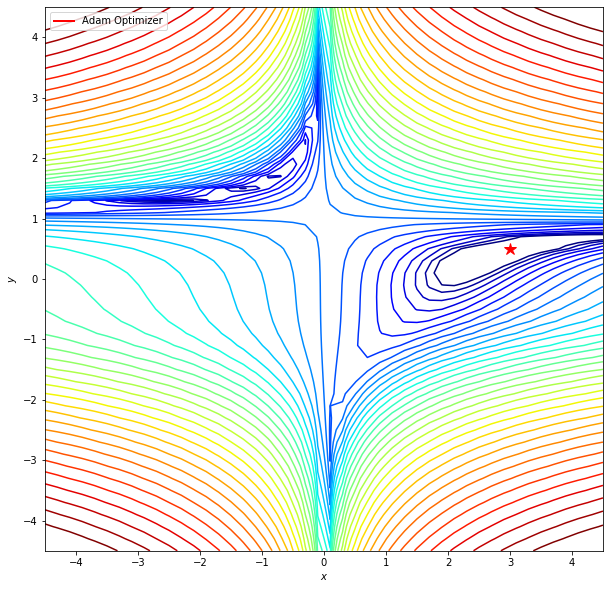

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=12)

line, = ax.plot([], [], 'r', label='Adam Optimizer', lw=2)
point, = ax.plot([], [], 'ro')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')

In [9]:
import matplotlib.animation as manimation; manimation.writers.list()

def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def animate(i):
    line.set_data(*path_trace[::,:i])
    point.set_data(*path_trace[::,i-1:i])
    return line, point

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path_trace.shape[1], interval=60, 
                               repeat_delay=5, blit=True)
HTML(anim.to_html5_video())

## 作業重點:

(1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化

(2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

## 作業目標:

取得各種優化器的運算結果

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from keras import optimizers

Using TensorFlow backend.


In [2]:
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
''' 

batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [4]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

W0719 16:30:24.523322 4724909504 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 16:30:24.528132 4724909504 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 16:30:24.530651 4724909504 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 16:30:24.570883 4724909504 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.

In [6]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1250858


In [7]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [8]:
# 第三步編譯
'''
SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''


# Example
opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

W0719 16:30:24.857319 4724909504 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0719 16:30:24.879235 4724909504 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
# 資料正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
# 是否要做資料處理
if not data_augmentation:
    print('Not using data augmentation.')
    history=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    print('')
        
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)
    history=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)   

'''
   第四步：訓練
   .fit的一些參數
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   shuffle：是否把數據隨機打亂之後再進行訓練
   validation_split：拿出百分之多少用來做交叉驗證
   verbose：屏顯模式 - 0：不輸出, 1：輸出進度, 2：輸出每次的訓練結果
''' 

Using real-time data augmentation.



W0719 16:30:27.151389 4724909504 deprecation.py:323] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 215s 4ms/step - loss: 1.7446 - acc: 0.3545 - val_loss: 1.3705 - val_acc: 0.5033
Epoch 2/20
50000/50000 [==============================] - 216s 4ms/step - loss: 1.3210 - acc: 0.5244 - val_loss: 1.1687 - val_acc: 0.5787
Epoch 3/20
50000/50000 [==============================] - 341s 7ms/step - loss: 1.1482 - acc: 0.5913 - val_loss: 1.0440 - val_acc: 0.6274
Epoch 4/20
50000/50000 [==============================] - 221s 4ms/step - loss: 1.0371 - acc: 0.6350 - val_loss: 0.9183 - val_acc: 0.6812
Epoch 5/20
50000/50000 [==============================] - 181s 4ms/step - loss: 0.9564 - acc: 0.6652 - val_loss: 0.8968 - val_acc: 0.6878
Epoch 6/20
50000/50000 [==============================] - 196s 4ms/step - loss: 0.8976 - acc: 0.6846 - val_loss: 0.9021 - val_acc: 0.6856
Epoch 7/20
50000/50000 [==============================] - 189s 4ms/step - loss: 0.8513 - acc: 0.7016 - val_loss: 0.7773 - 

'\n   第四步：訓練\n   .fit的一些參數\n   batch_size：對總的樣本數進行分組，每組包含的樣本數量\n   epochs ：訓練次數\n   shuffle：是否把數據隨機打亂之後再進行訓練\n   validation_split：拿出百分之多少用來做交叉驗證\n   verbose：屏顯模式 - 0：不輸出, 1：輸出進度, 2：輸出每次的訓練結果\n'

In [11]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /Users/johnsonhuang/py_ds/ML_100/2nd-ML100Days/homework/Day_076_HW/saved_models/keras_cifar10_trained_model.h5 
10000/10000 [==============================] - 7s 719us/step
Test loss: 0.7202451498031616
Test accuracy: 0.7544


In [12]:
#    第六步：輸出
import numpy 

print ( " test set " )
scores = model.evaluate(x_test,y_test,batch_size=200,verbose= 0)
print ( "" )
# print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)


result = model.predict(x_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)

 test set 

 The test loss is %f  [0.7202451431751251, 0.7543999981880188]


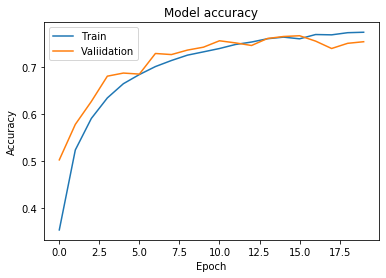

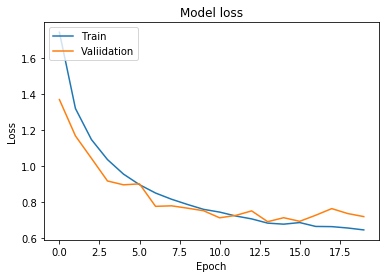

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()

## 參考資料



## 延伸閱讀

## [An overview of gradient descent optimization algorithms](https://arxiv.org/pdf/1609.04747.pdf)

--

在很多機器學習和深度學習的應用中，<font color="red">我們發現用的最多的優化器是Adam</font>，為什麼呢？

下面是TensorFlow中的優化器，https://www.tensorflow.org/api_guides/python/train

--

<font color="orange">在keras中也有SGD，RMSprop，Adagrad，Adadelta，Adam等</font>：https://keras.io/optimizers/

--

### [我們可以發現除了常見的梯度下降，還有Adadelta，Adagrad，RMSProp 等幾種優化器，都是什麼呢，又該怎麼選擇呢？](https://blog.csdn.net/qq_35860352/article/details/80772142)



### <font color="red">3. 如何選擇？</font>

如果數據是稀疏的，就用自適用方法，即Adagrad, Adadelta, RMSprop, Adam。

RMSprop, Adadelta, Adam 在很多情況下的效果是相似的。

Adam 就是在RMSprop 的基礎上加了bias-correction 和momentum，

隨著梯度變的稀疏，Adam 比RMSprop 效果會好。

整體來講，Adam 是最好的選擇。

很多論文裡都會用SGD，沒有momentum 等。SGD 雖然能達到極小值，但是比其它算法用的時間長，而且可能會被困在鞍點。

如果需要更快的收斂，或者是訓練更深更複雜的神經網絡，需要用一種自適應的算法。



--

Sebastian Ruder的這篇論文中給出了常用優化器的比較 https://arxiv.org/pdf/1609.04747.pdf

--



## 延伸閱讀:優化器是編譯Keras模型所需的兩個參數之一

from keras import optimizers 

model = Sequential() model.add(Dense(64, kernel_initializer='<font color="red">uniform</font>', input_shape=(10,))) 

model.add(Activation('<font color="red">softmax</font>’)) 

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) 

model.compile(loss='<font color="red">mean_squared_error</font>', optimizer='<font color="red">sgd</font>') 

您可以在傳遞優化器之前將其實例化model.compile()，如上例所示，或者您可以通過其名稱來調用它。

在後一種情況下，將使用優化程序的默認參數。


    # pass optimizer by name: default parameters will be used 

model.compile(loss='<font color="red">mean_squared_error</font>', optimizer='<font color="red">sgd</font>') 

--

### 所有Keras優化器通用的參數

的參數clipnorm和clipvalue可以與所有優化可以用來控制限幅梯度

![img1](https://ai100-fileentity.cupoy.com/2nd/homework/D76/1562826676216/large)


--

[延伸閱讀:二階優化算法](https://web.stanford.edu/class/msande311/lecture13.pdf)

二階優化算法使用了二階導數(也叫做Hessian方法 )來最小化或最大化損失函數。由於二階導數的計算成本很高，所以這種方法並沒有廣泛使用。

![img2](https://ai100-fileentity.cupoy.com/2nd/homework/D76/1562826714648/large)

--

## [延伸閱讀 : 自適應的算法](http://www.redcedartech.com/pdfs/Select_Optimization_Method.pdf )

如果需要更快的收斂，或者是訓練更深更複雜的神經網絡，需要用一種自適應的算法。



